In [33]:
import pandas as pd
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
# load data
df = pd.read_csv("MainEncodedData.csv")
del df['Unnamed: 0']
y=df['Attrition']
x=df.drop(df.columns[1], axis = 1)

In [16]:
# Feature Extraction with RFE
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False]
Feature Ranking: [39  9 46 35 45 44 47 13 43 10 34 14 48 49 30  1 42 33 20 38 19 31 22 15 32
 23 24 28 40 36 18  6 27 12 26 25  8 21 16  3 11  7  2  4  1 37 41  1 29 17
  5]


In [23]:
# feature extraction
pca = PCA(n_components=25)
fit = pca.fit(x)
# summarize components
print("Explained Variance: "+str( fit.explained_variance_ratio_))
print(str(fit.components_))

Explained Variance: [  6.91318435e-01   3.01516518e-01   4.94915195e-03   2.20695928e-03
   5.62404636e-06   1.02574332e-06   8.92900254e-07   6.33498468e-07
   1.83282150e-07   1.60744531e-07   8.19494374e-08   7.11388395e-08
   5.58144397e-08   4.91241329e-08   2.25928908e-08   1.65916399e-08
   1.61281157e-08   1.57378168e-08   1.34849238e-08   1.18751481e-08
   8.57005782e-09   6.80188910e-09   6.64450525e-09   6.48011268e-09
   4.82047167e-09]
[[  5.31766736e-05  -6.57075933e-07  -1.81543064e-03 ...,   3.71992190e-08
   -2.31729282e-06   2.28009360e-06]
 [  9.63953136e-04  -1.46288329e-06   8.39357185e-04 ...,   2.85152256e-06
    6.24330377e-06  -9.09482633e-06]
 [ -4.64069518e-05  -1.58486019e-05  -6.10306605e-02 ...,  -1.80092539e-05
    4.43027136e-05  -2.62934597e-05]
 ..., 
 [ -3.51694794e-03   1.26341021e-02  -6.04920559e-05 ...,  -6.07882666e-03
    2.04655213e-02  -1.43866946e-02]
 [  4.11517212e-04  -1.01720886e-01   2.45032561e-05 ...,   4.17097312e-02
   -4.66604594e-0

58
['age', 'businesstravel', 'dailyrate', 'degree', 'department_human', 'department_research', 'department_sales', 'development', 'director', 'distancefromhome', 'education', 'educationfield_human', 'educationfield_life', 'educationfield_marketing', 'educationfield_medical', 'educationfield_other', 'educationfield_technical', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'executive', 'gender_female', 'gender_male', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole_healthcare', 'jobrole_human', 'jobrole_laboratory', 'jobrole_manager', 'jobrole_manufacturing', 'jobrole_research', 'jobrole_sales', 'jobsatisfaction', 'maritalstatus_divorced', 'maritalstatus_married', 'maritalstatus_single', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'representative', 'resources', 'sciences', 'scientist', 'standardhours', 'stockoptionlevel', 'technician', 'totalworkingyears', 'trainingtimeslastyea

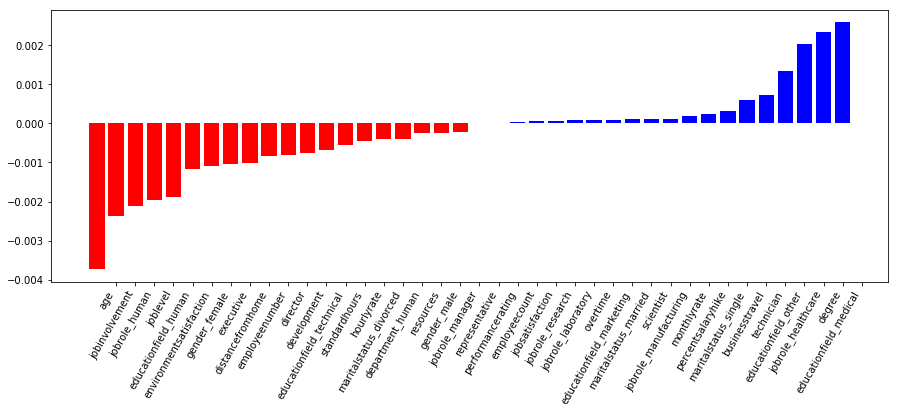

In [30]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(x)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x, y)
plot_coefficients(svm, cv.get_feature_names())


In [34]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(x, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

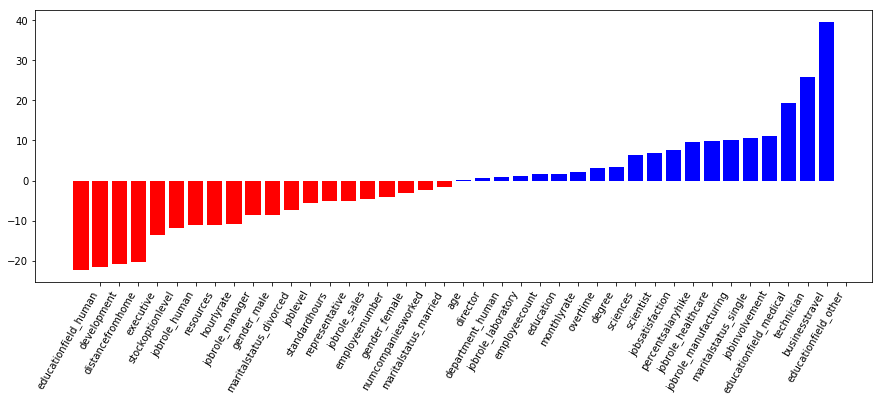

In [35]:
plot_coefficients(clf,cv.get_feature_names())